**[LeetCode Link](https://leetcode-cn.com/problems/flatten-binary-tree-to-linked-list/solution/dong-hua-yan-shi-si-chong-jie-fa-114-er-cha-shu-zh/)**

**[LeetCode Link](https://leetcode-cn.com/problems/flatten-binary-tree-to-linked-list/solution/biao-biao-zhun-zhun-de-hou-xu-bian-li-dai-ma-jian-/)**

## 前序遍历
* 用栈作为辅助数据结构。
* 在遍历的过程中，同时也将前后的节点串联起来，当整个遍历结束后，二叉树就变成链表结构了。
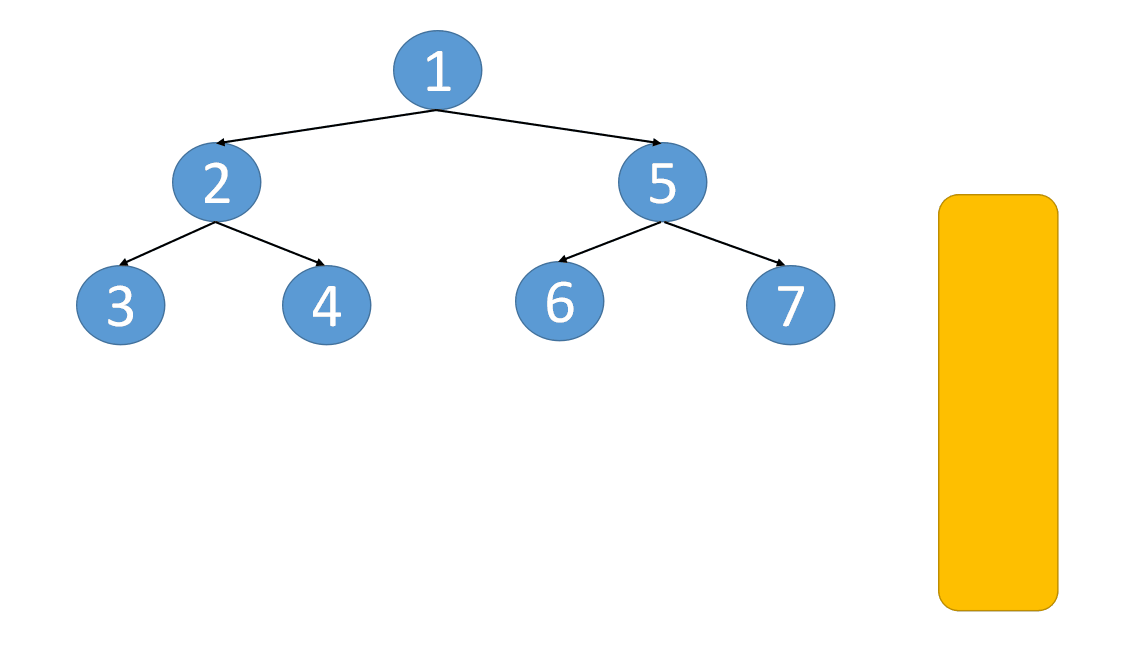

### 复杂度分析
* 时间复杂度:O(N)
* 空间复杂度:O(N)

In [ ]:
class Solution(object):
    def flatten(self, root):
        if not root:
            return
        stack = [root]
        pre = TreeNode(-1)
        while stack:
            # 用栈作为辅助数据结构，从栈中弹出元素后
            # 先将右节点放到栈中，再将左节点放入栈中，模拟前序遍历
            tmp = stack.pop()
            pre.left,pre.right = None,tmp
            # 先放入右节点，再放入左边点，顺序不能反了
            if tmp.right:
                stack.append(tmp.right)
            if tmp.left:
                stack.append(tmp.left)
            pre = tmp

## 后序遍历
当遍历到根节点后，我们对根节点的```左右子树```做一些调整。
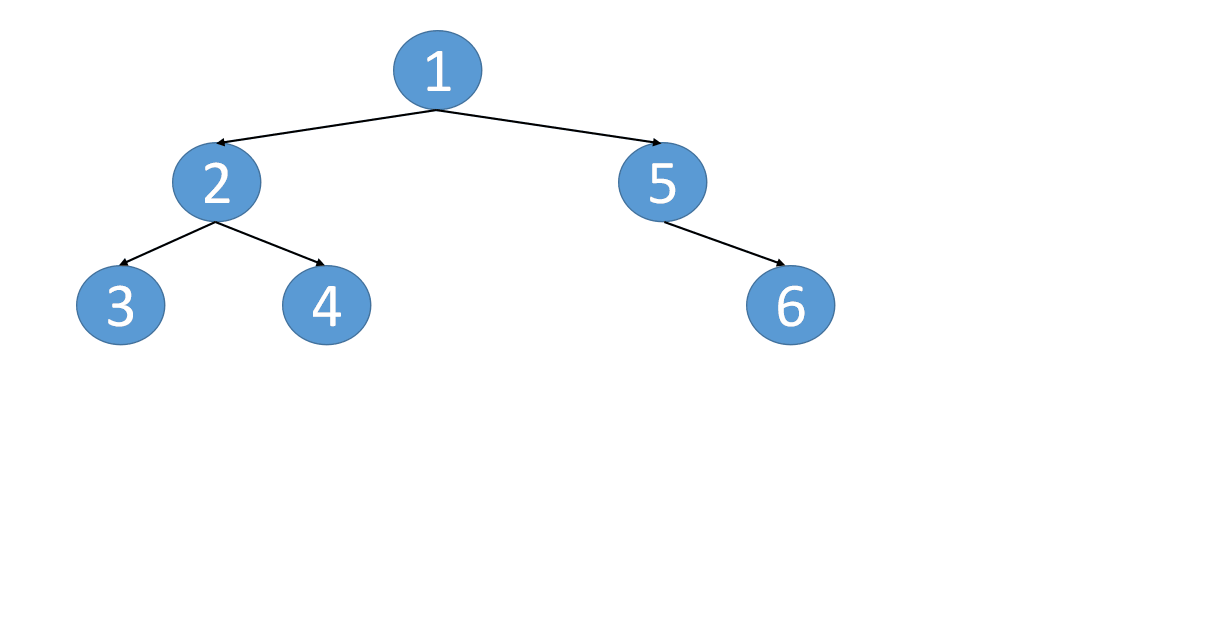
### 复杂度分析
* 时间复杂度:O(N)
* 空间复杂度:O(h),h是树高度

In [ ]:
# 递归
class Solution(object):
    def flatten(self, root):
        if not root:
            return
        self.flatten(root.left)
        self.flatten(root.right)
        # 将右子树挂到 左子树的最右边
        # 再将整个左子树挂到根节点的右边
        if root.left:
            pre = root.left
            while pre.right:
                pre = pre.right
            pre.right = root.right
            root.right = root.left
            root.left = None

In [ ]:
# 迭代，不使用辅助空间及全局变量
class Solution:
    def flatten(self, root: TreeNode) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        while (root != None):
            if root.left != None:
                pre = root.left
                while pre.right: pre = pre.right
                pre.right = root.right
                root.right = root.left
                root.left = None
            root = root.right
        return

## 右节点-左节点-根节点
前序遍历是:打印根节点-左节点-右节点 这样的顺序，如果是:右节点-左节点-打印根节点 这样完全相反的顺序遍历呢？
这样遍历完之后，正好跟前序遍历是相反的。
前序遍历完是```1,2,3,4,5,6```，按照这种新的方式遍历其结果是:```6,5,4,3,2,1```。
既然得到了反向的顺序，那么就可以把前后节点串联起来，当遍历到根节点1的时候，整个串联就完成了，二叉树就变成了链表。
```null<-6<-5<-4<-3<-2<-1```
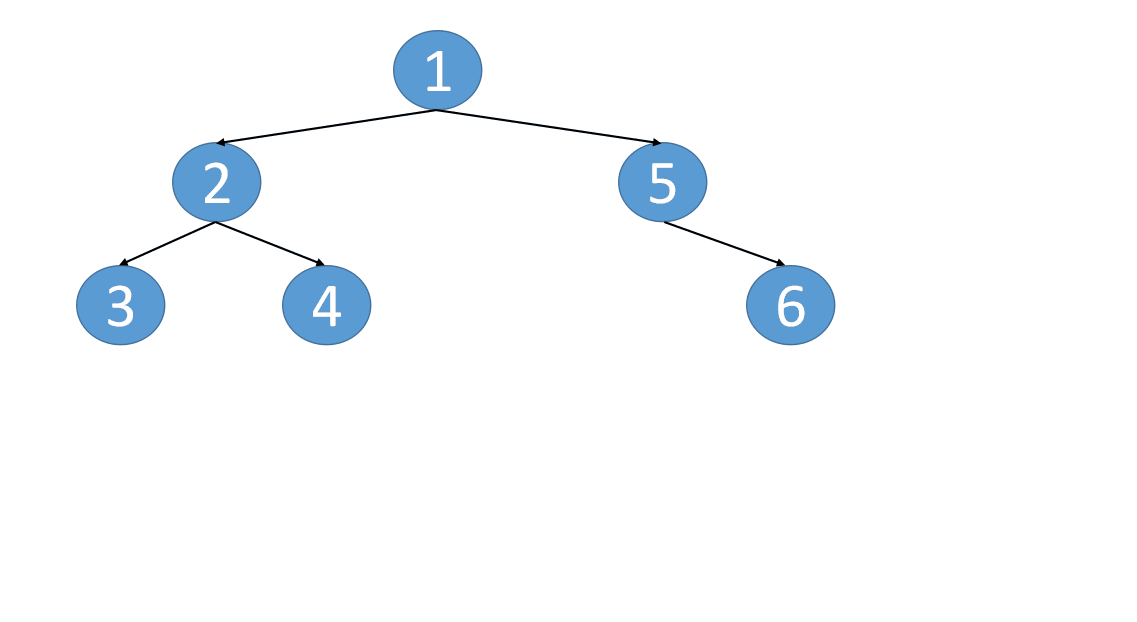
### 复杂度分析
* 时间复杂度:O(N)
* 空间复杂度:O(h),h是树高度

In [ ]:
class Solution(object):
    def flatten(self, root):
        self.pre = None
        def dfs(root):
            if not root:
                return None
            # 右节点-左节点-根节点 这种顺序正好跟前序遍历相反
            # 用pre节点作为媒介，将遍历到的节点前后串联起来
            dfs(root.right)
            dfs(root.left)
            root.left = None
            root.right = self.pre
            self.pre = root
        dfs(root)